### Analyzing Networks Tutorial

In [2]:
import networkx as nx
import DSGRN
from DSGRN import *

import sys
sys.setrecursionlimit(10**8)
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/src')
from PhenotypeGraphFun import *
from PhenotypeGraphviz import *
from networkx_cond import *
from GradientFun import *
from CondensationGraph_iter import *
from save_files import *
from get_FG import *
from get_FP_Poset import *
from all_networks_with_n_nodes_e_edges import *
from Anaylizing_cond_functions import *

### First, lets just see if the networks product graph has path existance.

all that is needed is a sting input of the network, and it will automatically build and save a network txt file, database and gradient graph. However, if these are already built and you don't want to rebuild them then you can just imput them into the function and run. Below is an example of both options:

In [22]:
# Calling this network similar underlying network or SUN for short.

network = """
Hb : (~Kni)
Gt : (~Kr)   
Kr : (~Kni)(~Gt)
Kni : (~Gt)(~Hb)"""

8640


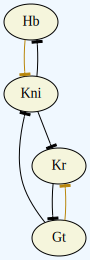

In [23]:
net = DSGRN.Network(network)
pg = ParameterGraph(net)
print(pg.size())
DrawGraph(net)

In [5]:
### First time computing, so I want the function to make the database and compute gradient graph
test_any_path_exists_in_product(network, network_filename='SUN')#8:90, 11:102, 1:162

Empty stop set


False

In [7]:
### Now that I have computed this once, I dont have to recompute the database or the gradient graph, so I put them in the function

grad_graph = load_json("grad_graph_strict_SUN")
database = Database("/home/elizabeth/Desktop/GIT/dsgrn_acdc/networks/SUN.db") 

test_any_path_exists_in_product(network, 'SUN', database = database, grad_graph = grad_graph)

Empty stop set


False

### Now lets take a look a larger network
This will take an hour or two to compute the gradient graph, so saving it in the process is helpful.

In [24]:
network = """
Hb : (Kr+Gt)(~Kni)
Gt : (~Kr)(Kni)   
Kr : (~Kni)(~Hb)
Kni : (~Gt)"""

1920000


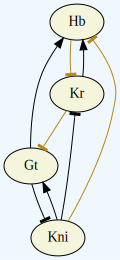

In [25]:
net = DSGRN.Network(network)
pg = ParameterGraph(net)
print(pg.size())
DrawGraph(net)

In [26]:
# Calling this one breaking negative feedback loops or BNFL for short
test_any_path_exists_in_product(network, network_filename='BNFL') #took 40 min: resutlts: False! 

Empty stop set


False

### Now we can look at any network of a specific number of nodes and edges

First I construct a list containing tuples. Each tuple represents a different graph, the first element of the tuple is the graph edges and the seconds us what sign each of those edges has. Making the convetion that a 0 is a repressing edge and a 1 is an activating edge. 

In [27]:
node_list = ['Hb', 'Gt', 'Kr', 'Kni']

all_network_comb = get_all_networks(node_list, 8)
len(all_network_comb)

126720

Once we get the set of netowrk, we need to know how many are computable by DSGRN.

In [29]:
computable = computable_networks(all_network_comb) #Take 5 min to run

Of the computable networks, how many have a small enough Parameter Graph? Currently defalted to PG size of StrongEdges.

In [33]:
allowed = return_computable_net_w_limited_PG_size(computable) # returns list of INDEX's of networks in all_network_comb
len(allowed)

46848

You can also check that each network is connected.

In [31]:
for net in allowed:
    H = convert_to_networkx(all_network_comb[net][0])
    if nx.is_weakly_connected(H) == False:
        print(net)

Then you can take a randome network from this list, and check if a paths exists list we did at the begining.

In [61]:
import random

list_network = random.choice(allowed)
print(all_network_comb[list_network])

network = get_network_string(all_network_comb[list_network]) ### Converting the list above to the network written as a string we can use for DSGRN
print(network)

((('Hb', 'Gt'), ('Gt', 'Hb'), ('Kr', 'Hb'), ('Kr', 'Gt'), ('Kr', 'Kni'), ('Kni', 'Hb'), ('Kni', 'Gt'), ('Kni', 'Kr')), [0, 1, 1, 0, 0, 0, 0, 0])
"""Hb : (Gt+Kr)(~Kni)
Gt : (~Hb)(~Kr)(~Kni)
Kr : (~Kni)
Kni : (~Kr)"""


1440000


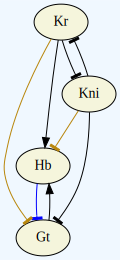

In [62]:
net = DSGRN.Network(network)
pg = ParameterGraph(net)
print(pg.size())
DrawGraph(net)  

In [77]:
test_any_path_exists_in_product(network, network_filename='Random_Choice_Network') #((('Hb', 'Gt'), ('Gt', 'Hb'), ('Kr', 'Hb'), ('Kr', 'Gt'), ('Kr', 'Kni'), ('Kni', 'Hb'), ('Kni', 'Gt'), ('Kni', 'Kr')), [0, 1, 1, 0, 0, 0, 0, 0])

Exception ignored in: <function Database.__del__ at 0x7fb87ba143b0>
Traceback (most recent call last):
  File "/home/elizabeth/anaconda3/lib/python3.7/site-packages/DSGRN/Query/Database.py", line 52, in __del__
    self.conn.commit()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140431088891712 and this is thread id 140429727102720.
Exception ignored in: <function Database.__del__ at 0x7fb87ba143b0>
Traceback (most recent call last):
  File "/home/elizabeth/anaconda3/lib/python3.7/site-packages/DSGRN/Query/Database.py", line 52, in __del__
    self.conn.commit()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140431088891712 and this is thread id 140429727102720.
Exception ignored in: <function Database.__del__ at 0x7fb87ba143b0>
Traceback (most recent call last):
  File "/home/elizabeth/anaconda3/lib/python3.7/s

Empty stop set


False

You can also visualize the Fixed Point Poset.

In [90]:
out_edges = get_number_out_edges_from_string(network)
print(out_edges)

FP_Poset = get_FP_Poset(out_edges)[0]

G = convert_dict_to_networkx(FP_Poset)
save_networkx_as_png(G, 'FP_Poset.png')

{'Hb': 1, 'Gt': 1, 'Kr': 3, 'Kni': 3}


Lets see if a network with the negative feedback loops works

In [109]:
edges_needed = [('Hb', 'Kni'), ('Kni', 'Hb'), ('Kr', 'Gt'), ('Gt', 'Kr')]
for n in allowed:
    count = 0
    for edge in edges_needed:
        if edge in all_network_comb[n][0]:
            count += 1
            if count == 4:
                network = get_network_string(all_network_comb[n])
                print(network)
                break
    else:
        continue
    break


"""Hb : (~Kni)
Gt : (~Hb)(~Kr)(~Kni)
Kr : (~Hb)(~Gt)(~Kni)
Kni : (~Hb)"""


1440000


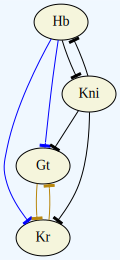

In [110]:
net = DSGRN.Network(network)
pg = ParameterGraph(net)
print(pg.size())
DrawGraph(net)  

In [111]:
test_any_path_exists_in_product(network, network_filename='Choice_w_neg_feedback_loops')

Exception ignored in: <function Database.__del__ at 0x7fb87ba143b0>
Traceback (most recent call last):
  File "/home/elizabeth/anaconda3/lib/python3.7/site-packages/DSGRN/Query/Database.py", line 52, in __del__
    self.conn.commit()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140431088891712 and this is thread id 140429441881856.
Exception ignored in: <function Database.__del__ at 0x7fb87ba143b0>
Traceback (most recent call last):
  File "/home/elizabeth/anaconda3/lib/python3.7/site-packages/DSGRN/Query/Database.py", line 52, in __del__
    self.conn.commit()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140431088891712 and this is thread id 140429441881856.


Path exists from 528 to 4


True

### We can make a file for Gephi vizualization for any of this!  

In [3]:
database = Database("/home/elizabeth/Desktop/GIT/dsgrn_acdc/networks/Choice_w_neg_feedback_loops.db") 
network_txt_filename = '/home/elizabeth/Desktop/GIT/dsgrn_acdc/networks/Choice_w_neg_feedback_loops.txt'
with open(network_txt_filename,"r") as f:
        network = f.read()

grad_graph = load_json('grad_graph_strict_Choice_w_neg_feedback_loops')
graphml_filename = "Choice_w_neg_feedback_loops_source.graphml"

In [146]:
get_gephi_graph_for_cond(database, network, grad_graph, graphml_filename)

### Also, we can look at what Factor Graph combinations are requred on a minimal diagonal.

In [4]:

out_edges = get_number_out_edges_from_string(network)
FP_Poset = get_FP_Poset(out_edges)[0]
G, ngg  = reduce_gradient_graph_to_nodes_of_interest(database, grad_graph, FP_Poset)
strongcc = strongly_connected_components_by_MGI(G, database)
cG, scc = condensation(G, strongcc)
Hb_list, Kni_list = get_Hb_Kni_list(database)
Hb_max = len(Hb_list)-1
Kni_max = len(Kni_list)-1

In [6]:
P = get_product_graph(database, cG, scc, FP_Poset)
start_set, stop_set = return_start_stop_set(database, P, scc, Hb_max, Kni_max)

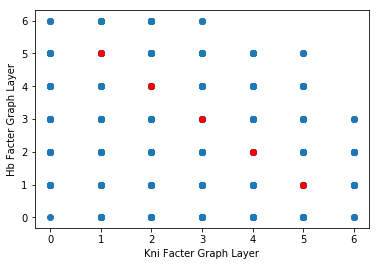

In [28]:
breaks = find_breaks_in_FG_comb(database, P, scc, Hb_max, Kni_max) #Everything in red is requred or the product graph becomes disconnected.